In [118]:
import pandas as pd
import xgboost as xgb

輸入資料

In [119]:
select_hyper_TSS=pd.read_csv('../result/result_regulation_dbeta_0.35.csv')
select_hyper_TSS=select_hyper_TSS[(select_hyper_TSS['methylation_level']=='Hyper') & ((select_hyper_TSS['feature']=='TSS1500')|(select_hyper_TSS['feature']=='TSS200'))]
select_hyper_TSS

,ID,dbeta,gene,"J,J","J,CZ","J,ER","J,F1","CZ,J","CZ,CZ","CZ,ER",...,cgi,feat.cgi,UCSC_CpG_Islands_Name,DHS,Enhancer,Phantom,Probe_SNPs,Probe_SNPs_10,methylation_level,regulation
1,cg10266490,0.403402,ACOT11,0.6750,0.6750,0.6750,0.6750,0.70090,0.70090,0.70090,...,opensea,TSS200-opensea,NaN,NaN,NaN,NaN,NaN,NaN,Hyper,Up
6,cg26573704,0.408026,ADAMTS12,0.6375,0.6375,0.6375,0.6375,0.66415,0.66415,0.66415,...,island,TSS200-island,chr5:33892191-33892403,True,NaN,high-CpG:33927847-33928066,NaN,NaN,Hyper,Up
8,cg19619405,0.446404,ADAMTS20,0.7400,0.7400,0.6775,0.7400,0.75600,0.75600,0.70005,...,island,TSS200-island,chr12:43944719-43946285,NaN,NaN,NaN,rs275603,rs71455455,Hyper,Up
14,cg09651145,0.409495,AFAP1L1,0.7075,0.7075,0.6075,0.6975,0.72675,0.72675,0.63900,...,island,TSS1500-island,chr5:148650920-148651772,True,NaN,NaN,NaN,NaN,Hyper,Up
20,cg08076018,0.461530,ANGPTL2,0.5925,0.5925,0.4175,0.5900,0.62995,0.62995,0.48575,...,opensea,TSS200-opensea,NaN,NaN,NaN,NaN,NaN,NaN,Hyper,Up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,cg19593767,0.350825,TOX2,0.6800,0.6800,0.5900,0.6800,0.70200,0.70200,0.63080,...,island,TSS200-island,chr20:42543097-42545137,True,NaN,NaN,NaN,NaN,Hyper,Up
366,cg11213574,0.371360,TRABD,0.8275,0.8275,0.8375,0.8275,0.83280,0.83280,0.84365,...,island,TSS1500-island,chr22:50623164-50625226,NaN,True,NaN,NaN,NaN,Hyper,Up
372,cg07783282,0.402763,USP44,0.7200,0.7200,0.7675,0.7200,0.72960,0.72960,0.77785,...,island,TSS1500-island,chr12:95941906-95942979,True,NaN,NaN,NaN,NaN,Hyper,Up
382,cg06274159,0.420303,ZFP42,0.5700,0.5725,0.5725,0.5725,0.60900,0.60690,0.60690,...,island,TSS200-island,chr4:188916605-188916876,NaN,NaN,NaN,NaN,NaN,Hyper,Up


In [120]:
normalized_train = pd.read_csv('../result/all_beta_normalized_train_0.35.csv')
normalized_test = pd.read_csv('../result/all_beta_normalized_test_0.35.csv')
data = pd.read_csv('../result/result_basic_dbeta_0.35.csv')
data=data[data['gene'].isin(select_hyper_TSS['gene'])]
# cluster_3 =pd.read_csv('../result/wards_cluster/gene_clusters_3.csv')
# cluster_3 = data[data['gene'].isin(cluster_3['Gene'])]
data

,Unnamed: 0,dbeta,gene,"J,J","J,CZ","J,ER","J,F1","CZ,J","CZ,CZ","CZ,ER",...,Type,feature,cgi,feat.cgi,UCSC_CpG_Islands_Name,DHS,Enhancer,Phantom,Probe_SNPs,Probe_SNPs_10
1,cg10266490,0.403402,ACOT11,0.6750,0.6750,0.6750,0.6750,0.70090,0.70090,0.70090,...,II,TSS200,opensea,TSS200-opensea,NaN,NaN,NaN,NaN,NaN,NaN
6,cg26573704,0.408026,ADAMTS12,0.6375,0.6375,0.6375,0.6375,0.66415,0.66415,0.66415,...,II,TSS200,island,TSS200-island,chr5:33892191-33892403,True,NaN,high-CpG:33927847-33928066,NaN,NaN
8,cg19619405,0.446404,ADAMTS20,0.7400,0.7400,0.6775,0.7400,0.75600,0.75600,0.70005,...,I,TSS200,island,TSS200-island,chr12:43944719-43946285,NaN,NaN,NaN,rs275603,rs71455455
14,cg09651145,0.409495,AFAP1L1,0.7075,0.7075,0.6075,0.6975,0.72675,0.72675,0.63900,...,II,TSS1500,island,TSS1500-island,chr5:148650920-148651772,True,NaN,NaN,NaN,NaN
20,cg08076018,0.461530,ANGPTL2,0.5925,0.5925,0.4175,0.5900,0.62995,0.62995,0.48575,...,II,TSS200,opensea,TSS200-opensea,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,cg19593767,0.350825,TOX2,0.6800,0.6800,0.5900,0.6800,0.70200,0.70200,0.63080,...,I,TSS200,island,TSS200-island,chr20:42543097-42545137,True,NaN,NaN,NaN,NaN
366,cg11213574,0.371360,TRABD,0.8275,0.8275,0.8375,0.8275,0.83280,0.83280,0.84365,...,I,TSS1500,island,TSS1500-island,chr22:50623164-50625226,NaN,True,NaN,NaN,NaN
372,cg07783282,0.402763,USP44,0.7200,0.7200,0.7675,0.7200,0.72960,0.72960,0.77785,...,II,TSS1500,island,TSS1500-island,chr12:95941906-95942979,True,NaN,NaN,NaN,NaN
382,cg06274159,0.420303,ZFP42,0.5700,0.5725,0.5725,0.5725,0.60900,0.60690,0.60690,...,II,TSS200,island,TSS200-island,chr4:188916605-188916876,NaN,NaN,NaN,NaN,NaN


In [31]:
normalized_train_c = pd.merge(normalized_train, normalized_test, on = "Unnamed: 0")
# normalized_train_c = normalized_train[normalized_train['Unnamed: 0'].isin(normalized_test['Unnamed: 0'])]
# normalized_train_c = normalized_train_c[normalized_train_c['Unnamed: 0'].isin(cluster_3['Unnamed: 0'])]
normalized_train_c = normalized_train_c[normalized_train_c['Unnamed: 0'].isin(data['Unnamed: 0'])]
normalized_train_c.iloc[:,1::2]

,1_x,3_x,5_x,7_x,9_x,11_x,13_x,15_x,17_x,19_x,...,881_y,883_y,885_y,887_y,889_y,891,893,895,897,899
0,0.229817,0.079642,0.180363,0.182330,0.156993,0.174448,0.170768,0.283547,0.299189,0.173554,...,0.733207,0.810674,0.629002,0.631744,0.489297,0.620474,0.587984,0.725763,0.543097,0.627478
3,0.029336,0.031738,0.052790,0.075713,0.052144,0.058213,0.056716,0.066261,0.170566,0.056618,...,0.668870,0.884092,0.657520,0.776370,0.573960,0.702896,0.742537,0.722355,0.619104,0.588905
8,0.038396,0.042117,0.082929,0.100448,0.018773,0.123761,0.060578,0.186393,0.349413,0.053956,...,0.703152,0.785134,0.017098,0.781220,0.750677,0.829628,0.711433,0.808927,0.784102,0.027320
15,0.027609,0.025782,0.049212,0.175750,0.064068,0.038841,0.065511,0.048958,0.124838,0.041172,...,0.070183,0.116336,0.067032,0.795447,0.709611,0.697383,0.527117,0.501497,0.799886,0.077927
17,0.052691,0.035724,0.050791,0.112244,0.048276,0.064553,0.040120,0.060777,0.112316,0.039051,...,0.641107,0.730824,0.389601,0.688854,0.587882,0.648012,0.611959,0.611590,0.593076,0.418179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,0.231621,0.144552,0.101374,0.161753,0.051920,0.116728,0.099301,0.162901,0.392257,0.122150,...,0.859693,0.641820,0.939523,0.923721,0.867354,0.918738,0.626382,0.835459,0.853828,0.793100
369,0.286010,0.089658,0.278705,0.310905,0.264841,0.398138,0.317772,0.406807,0.502564,0.269425,...,0.808848,0.840784,0.858320,0.817132,0.746696,0.846385,0.602118,0.745292,0.740818,0.740632
376,0.071776,0.032173,0.099534,0.227998,0.056563,0.132320,0.110678,0.176403,0.413780,0.075362,...,0.847574,0.779241,0.681112,0.846710,0.795247,0.847231,0.671809,0.637060,0.808902,0.728156
380,0.291352,0.047059,0.154173,0.202507,0.105295,0.242842,0.277461,0.428910,0.404368,0.141991,...,0.859093,0.675661,0.613787,0.928101,0.918148,0.272924,0.468551,0.791687,0.877826,0.576459


In [32]:
X_train = normalized_train_c.iloc[:, 1::2]

x = []

for i in range(895):
    X = X_train.iloc[:, i]

    X = X.values.flatten().T.tolist()
    print(X)
    x.append(X)

y = [ (0 if (i < 47)or(i>444 and i <495 ) else 1)   for i in range(895)]
y.count(1)

[0.229816513761468, 0.0293363714041584, 0.0383959044368601, 0.0276088425523699, 0.0526907630522088, 0.11117188568303, 0.0922519913106445, 0.0272300469483568, 0.0622713738834538, 0.0705340977670489, 0.0383516931864545, 0.149641000247586, 0.101112877583466, 0.0478826874158312, 0.0689244923857868, 0.111953423494451, 0.163211458725971, 0.0574533151148416, 0.171408934707904, 0.213666438512434, 0.0234722784297855, 0.11996305276527, 0.0678646355924473, 0.0478349120433018, 0.0878622727041206, 0.0756670902160102, 0.143022104915869, 0.0230098779779198, 0.030446349394029, 0.153390348197923, 0.0274857832155781, 0.273809523809524, 0.0764866849095642, 0.0453711256117455, 0.0864583333333333, 0.142991921693496, 0.095884724857685, 0.0999251281460577, 0.145300333704116, 0.0583982202447164, 0.0357275772236695, 0.122214234363767, 0.126703096539162, 0.132557729596334, 0.0683610867659947, 0.177793132773467, 0.0362401715511079, 0.0957539751878385, 0.378091073158291, 0.0864835666413332, 0.214749358977398, 0.1

798

 RFE 篩選

In [33]:
import numpy as np
# from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.feature_selection import RFECV,RFE
from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import matthews_corrcoef
# from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree
from collections import Counter
from imblearn.over_sampling import RandomOverSampler



訓練集樣本數量： 716
測試集樣本數量： 179
訓練集中各類別樣本數量：
Counter({1: 637, 0: 79})
測試集中各類別樣本數量：
Counter({1: 161, 0: 18})
過採樣後的類別分佈： Counter({1: 637, 0: 79})
Selected Features:      Unnamed: 0
0    cg03520644
17   cg09238180
47   cg14502484
48   cg16126280
71   cg07792478
72   cg13267264
76   cg24848035
106  cg24604013
115  cg07445246
138  cg13545212
146  cg14231297
164  cg00421624
177  cg10266490
217  cg15540820
219  cg16428251
220  cg17152757
225  cg06274159
247  cg11934419
304  cg04574090
313  cg18710784
347  cg26405020
348  cg00044665
349  cg01146232
359  cg20388732
369  cg09293816
Selected Features:      Unnamed: 0
0    cg03520644
17   cg09238180
47   cg14502484
48   cg16126280
69   cg27494647
71   cg07792478
72   cg13267264
76   cg24848035
101  cg19619405
106  cg24604013
115  cg07445246
138  cg13545212
144  cg02571816
146  cg14231297
164  cg00421624
177  cg10266490
217  cg15540820
219  cg16428251
220  cg17152757
225  cg06274159
247  cg11934419
257  cg01158680
304  cg04574090
313  cg18710784
343  cg2

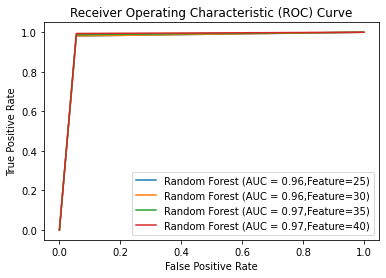

           Model Features       AUC  Incorrect Predictions   J-index  \
0  Random Forest       25  0.962905                    4.0  0.940387   
1  Random Forest       30  0.962905                    4.0  0.940387   
2  Random Forest       35  0.966011                    3.0  0.958396   
3  Random Forest       40  0.969117                    2.0  0.976404   

                                  Selected Features:  f1_score  
0       Unnamed: 0
0    cg03520644
17   cg0923818...  0.987500  
1       Unnamed: 0
0    cg03520644
17   cg0923818...  0.987500  
2       Unnamed: 0
0    cg03520644
15   cg0403703...  0.990654  
3       Unnamed: 0
0    cg03520644
15   cg0403703...  0.993789  


In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"訓練集樣本數量： {len(X_train)}")
print(f"測試集樣本數量： {len(X_test)}")
# 假設y是你的標籤
train_class_distribution = Counter(y_train)
test_class_distribution = Counter(y_test)
print("訓練集中各類別樣本數量：")
print(train_class_distribution)
print("測試集中各類別樣本數量：")
print(test_class_distribution)


# 使用 RandomOverSampler 進行過採樣
# ros = RandomOverSampler(random_state=42)
# X_train, y_train = ros.fit_resample(X_train, y_train)
# 顯示過採樣後的類別分佈
print("過採樣後的類別分佈：", Counter(y_train))


models = {
    # 'SVM': SVC(),#(40之後可能過擬合)
    # 'Logistic Regression': LogisticRegression(),
    # 'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),#跑太久
    # 'XGBoost': XGBClassifier()
}

results = pd.DataFrame(columns=['Model', 'Features'])
feature_counts = [i for i in range(25,41,5)]
# feature_counts = [3]
# svc = SVC(kernel="linear")
# model=svc

logreg_clf = LogisticRegression()
model=logreg_clf

# dt_clf = DecisionTreeClassifier()
# model=dt_clf

# rf_clf = RandomForestClassifier()
# model=rf_clf

# xgb_clf = XGBClassifier()
# model=xgb_clf

for feature_count in feature_counts:
    
    # 使用 RFE 選擇特徵
    rfe = RFE(estimator=model, n_features_to_select=feature_count)
    X_train_rfe = rfe.fit_transform(X_train, y_train)

    selected_feature_indices = rfe.support_
    X_train_df = pd.DataFrame(X_train)
    selected_feature_names = pd.DataFrame(normalized_train_c.iloc[selected_feature_indices,0])
    feature_ranking = rfe.ranking_
    #print("Feature Ranking:\n", feature_ranking)

    for test_model_name,_ in models.items():
        if (test_model_name=="SVM"):
            svc = SVC(kernel="linear")
            test_model=svc

        elif (test_model_name=="Logistic Regression"):
            logreg_clf = LogisticRegression()
            test_model=logreg_clf

        elif (test_model_name=="Random Forest"):
            rf_clf = RandomForestClassifier()
            test_model=rf_clf

        else:
            xgb_clf = XGBClassifier()
            test_model=xgb_clf

        test_model.fit(X_train_rfe, y_train)
        # 計算訓練集上的準確度 (使用交叉驗證)
        train_accuracy_cv = cross_val_score(test_model, X_train_rfe, y_train, cv=5, scoring='accuracy').mean()
        # 繪製決策樹
        # plt.figure(figsize=(12, 8))
        # plot_tree(model, filled=True, feature_names=X_train_df.columns)
        # plt.title(f"{model_name} Decision Tree with {feature_count} Features")
        # plt.show()

        # 在測試集上進行預測
        X_test_rfe = rfe.transform(X_test)
        y_pred = test_model.predict(X_test_rfe)


        # 將 X_test 轉換為 DataFrame
        X_test_df = pd.DataFrame(X_test)
        # 比對預測標籤和實際標籤(預測錯誤的樣本)
        incorrect_predictions = X_test_df.loc[y_pred != y_test]
        # 獲得預測錯誤的樣本索引
        incorrect_indices = X_test_df.index[y_pred != y_test]


        accuracy_test = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        mcc = matthews_corrcoef(y_test, y_pred) #1 表示完美預測，0 表示模型的性能與隨機預測相當，而 -1 表示完全相反的預測。
        
        # 計算 ROC 曲線的參數
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        # 繪製 ROC 曲線
        plt.plot(fpr, tpr, label=f'{test_model_name} (AUC = {roc_auc:.2f},Feature={feature_count})')

        results = results.append({'Model': test_model_name, 'Features': feature_count,
                        #   'Recall': recall, 
                        #   'MCC': mcc, 
                            'f1_score': f1,'AUC' : roc_auc,'J-index' : recall + accuracy_test - (1 - recall) - 1,
                        #   'Precision': precision,
                        #   'Accuracy': (train_accuracy_cv + accuracy_test) / 2,
                        #   'Train Accuracy (Cross-Validation)': train_accuracy_cv,
                        #   'Test Accuracy': accuracy_test,
                        #   'difference': train_accuracy_cv - accuracy_test,
                        'Selected Features:':selected_feature_names,
                          'Incorrect Predictions': len(incorrect_indices)}, ignore_index=True)

        print('Selected Features:',selected_feature_names)
        

# 添加圖例
plt.legend(loc="lower right")

# 添加標籤
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")

# 顯示圖表
plt.show()



# 顯示結果
print(results)



In [35]:
results.to_csv('../result/RFE_0.35_Hyper&TSS.csv', index=False)

In [3]:
import matplotlib.pyplot as plt

model_results = results[results['Model']=="Random Forest"]

plt.figure(figsize=(8, 6))
plt.plot(model_results['Features'], model_results['Train Accuracy (Cross-Validation)'], label='Train Accuracy (Cross-Validation)')
plt.plot(model_results['Features'], model_results['Test Accuracy'], label='Test Accuracy')

plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs Number of Features')

plt.legend()

plt.show()


NameError: name 'results' is not defined

1. 剩下40個做 RFECV  
結果: 數量太多無法確定最佳特徵數
2. 40個做GO分群再用RFECV  
第1群:12  
第2群:11  
第3群:5  
第4群:11
* 少一個是缺 TRABD(正常，在計算相似度就沒有了)

In [122]:
method1_gene=pd.read_csv("../result/RFE_method1/RFE_gene_40.csv")
data=data[data['Unnamed: 0'].isin(method1_gene['ID'])]
# GO轉 Entrez ID有換別名
data[(data['gene']=='GRASP')]='TAMALIN'
data[(data['gene']=='SLC9A3R1')]='NHERF1'
# MIR1204、TRABD 沒有出現在4群中(正常，在計算相似度就沒有了)
cluster_1 =pd.read_csv('../result/wards_cluster/gene_clusters_1.csv')
cluster_1 = data[(data['gene'].isin(cluster_1['Gene']))]
cluster_2 =pd.read_csv('../result/wards_cluster/gene_clusters_2.csv')
cluster_2 = data[(data['gene'].isin(cluster_2['Gene']))]
cluster_3 =pd.read_csv('../result/wards_cluster/gene_clusters_3.csv')
cluster_3 = data[(data['gene'].isin(cluster_3['Gene']))]
cluster_4 =pd.read_csv('../result/wards_cluster/gene_clusters_4.csv')
cluster_4 = data[(data['gene'].isin(cluster_4['Gene']))]

cluster_1.to_csv("../result/RFE_method1/40_GOcluster1.csv",index=False)
cluster_2.to_csv("../result/RFE_method1/40_GOcluster2.csv",index=False)
cluster_3.to_csv("../result/RFE_method1/40_GOcluster3.csv",index=False)
cluster_4.to_csv("../result/RFE_method1/40_GOcluster4.csv",index=False)


In [123]:
data=cluster_1
data

,Unnamed: 0,dbeta,gene,"J,J","J,CZ","J,ER","J,F1","CZ,J","CZ,CZ","CZ,ER",...,Type,feature,cgi,feat.cgi,UCSC_CpG_Islands_Name,DHS,Enhancer,Phantom,Probe_SNPs,Probe_SNPs_10
29,cg18759209,0.373932,BMP7,0.695,0.695,0.695,0.695,0.7137,0.7137,0.7137,...,I,TSS1500,shore,TSS1500-shore,chr20:55840216-55841794,True,NaN,NaN,NaN,NaN
109,cg09293816,0.364452,FCGRT,0.775,0.775,0.775,0.775,0.7876,0.7876,0.7876,...,II,TSS200,shore,TSS200-shore,chr19:50016531-50016851,True,NaN,NaN,NaN,NaN
111,cg26405020,0.369003,FES,0.74,0.74,0.74,0.74,0.756,0.756,0.756,...,II,TSS1500,shore,TSS1500-shore,chr15:91427540-91427905,True,NaN,NaN,NaN,NaN
126,cg04037038,0.368369,FRZB,0.675,0.675,0.675,0.675,0.6981,0.6981,0.6981,...,I,TSS1500,island,TSS1500-island,chr2:183731819-183732093,True,NaN,NaN,NaN,NaN
188,cg01158680,0.407395,MAGI2,0.6375,0.6375,0.6375,0.6375,0.66885,0.66885,0.66885,...,II,TSS1500,shore,TSS1500-shore,chr7:79082174-79082427,NaN,NaN,NaN,NaN,NaN
194,cg07792478,0.438058,MIR124-2,0.835,0.835,0.835,0.835,0.84,0.84,0.84,...,I,TSS1500,island,TSS1500-island,chr8:65290108-65290946,NaN,NaN,NaN,NaN,NaN
230,cg18710784,0.413429,OPCML,0.7975,0.7175,0.7175,0.7175,0.80605,0.7371,0.7371,...,II,TSS1500,island,TSS1500-island,chr11:132813562-132814395,NaN,NaN,NaN,NaN,NaN
264,cg02571816,0.355784,PPP1R14A,0.7675,0.7675,0.7675,0.7675,0.7797,0.7797,0.7797,...,I,TSS1500,island,TSS1500-island,chr19:38746638-38747379,True,NaN,NaN,NaN,NaN
282,cg27494647,0.419924,RARRES2,0.635,0.635,0.635,0.635,0.6683,0.6683,0.6683,...,I,TSS200,island,TSS200-island,chr7:150037459-150039031,True,NaN,NaN,NaN,NaN
292,cg24848035,0.435928,RGS22,0.6475,0.6475,0.555,0.6475,0.67855,0.67855,0.5985,...,I,TSS200,island,TSS200-island,chr8:101117922-101118693,NaN,True,NaN,rs2980532,NaN


In [124]:
normalized_train_c = normalized_train_c[normalized_train_c['Unnamed: 0'].isin(data['Unnamed: 0'])]
normalized_train_c.iloc[:,1::2]

,1_x,3_x,5_x,7_x,9_x,11_x,13_x,15_x,17_x,19_x,...,881_y,883_y,885_y,887_y,889_y,891,893,895,897,899
15,0.027609,0.025782,0.049212,0.175750,0.064068,0.038841,0.065511,0.048958,0.124838,0.041172,...,0.070183,0.116336,0.067032,0.795447,0.709611,0.697383,0.527117,0.501497,0.799886,0.077927
69,0.213666,0.073428,0.161137,0.228501,0.150540,0.120251,0.141940,0.259259,0.343395,0.164769,...,0.599281,0.858456,0.839038,0.660000,0.422307,0.777284,0.652473,0.767500,0.758002,0.702717
71,0.119963,0.081919,0.130510,0.203574,0.122578,0.157288,0.129305,0.143793,0.248650,0.090493,...,0.767979,0.766230,0.797433,0.545422,0.135533,0.858363,0.448807,0.422477,0.767451,0.754361
76,0.087862,0.034526,0.130081,0.138430,0.113358,0.213645,0.133462,0.183994,0.363293,0.092875,...,0.684225,0.784926,0.763910,0.669996,0.576848,0.803331,0.602196,0.628891,0.658230,0.462235
115,0.142992,0.200631,0.190305,0.230727,0.160928,0.347525,0.172552,0.310520,0.297234,0.241127,...,0.665617,0.861787,0.839421,0.650707,0.617996,0.661609,0.641933,0.605245,0.682650,0.486723
144,0.035728,0.057211,0.065750,0.124141,0.048405,0.083402,0.174061,0.134460,0.255631,0.066265,...,0.698627,0.862826,0.819317,0.497123,0.757971,0.606285,0.645084,0.703989,0.666344,0.104041
156,0.068361,0.029846,0.085575,0.151884,0.065453,0.132642,0.109979,0.154714,0.289530,0.052783,...,0.632032,0.753759,0.161015,0.673674,0.636337,0.663105,0.457523,0.665704,0.702655,0.269525
191,0.053127,0.009418,0.059227,0.082169,0.107294,0.101493,0.065315,0.185181,0.354794,0.035552,...,0.757975,0.009719,0.509984,0.860785,0.835805,0.911654,0.443064,0.723827,0.474376,0.580507
257,0.060795,0.029493,0.064205,0.136895,0.061343,0.073168,0.066752,0.090170,0.238870,0.074047,...,0.830940,0.903489,0.632907,0.662827,0.686778,0.872502,0.604920,0.636824,0.702417,0.421273
313,0.051052,0.041074,0.038762,0.135968,0.029478,0.105434,0.115278,0.109649,0.111065,0.071068,...,0.862548,0.893797,0.855636,0.883928,0.254995,0.918276,0.473949,0.428677,0.742574,0.688996


In [125]:
X_train = normalized_train_c.iloc[:, 1::2]

x = []

for i in range(895):
    X = X_train.iloc[:, i]

    X = X.values.flatten().T.tolist()
    print(X)
    x.append(X)

y = [ (0 if (i < 47)or(i>444 and i <495 ) else 1)   for i in range(895)]
y.count(1)

[0.0276088425523699, 0.213666438512434, 0.11996305276527, 0.0878622727041206, 0.142991921693496, 0.0357275772236695, 0.0683610867659947, 0.0531274748060535, 0.0607946921610254, 0.0510516142557873, 0.263061570114487, 0.286009840890415]
[0.0257815419105742, 0.0734282907662083, 0.0819189227100575, 0.0345258163201598, 0.200630914826498, 0.0572106261859583, 0.0298455544733547, 0.0094179637026461, 0.0294934532599286, 0.0410739841088487, 0.0396705543115099, 0.0896583230814877]
[0.0492116099226675, 0.161137440758294, 0.130510368806656, 0.130080879303194, 0.190304840790278, 0.0657504029863409, 0.0855747195754433, 0.0592266440532746, 0.0642049987577343, 0.0387616845325058, 0.216701706921701, 0.278705215747593]
[0.175749894381073, 0.228500619578687, 0.203573707721761, 0.138429752066116, 0.230727285120305, 0.124141221374046, 0.15188436958729, 0.0821689828945038, 0.1368951710207, 0.135968180270871, 0.28648622878481, 0.310905168450096]
[0.0640677424508707, 0.150539568345324, 0.1225782414307, 0.11335

798

2
Optimal Number of Features: 6
cross validation acc 0.9743078859060403
3
Optimal Number of Features: 10
cross validation acc 0.9776548225629055
4
Optimal Number of Features: 9
cross validation acc 0.9765524903907751
5
Optimal Number of Features: 6
cross validation acc 0.9776536312849162
6
Optimal Number of Features: 9
cross validation acc 0.9765473527218494
7
Optimal Number of Features: 6
cross validation acc 0.976544924071991
8
Optimal Number of Features: 9
cross validation acc 0.9776685167310167
9
Optimal Number of Features: 9
cross validation acc 0.9765544332210998
10
Optimal Number of Features: 9
cross validation acc 0.9776779026217228


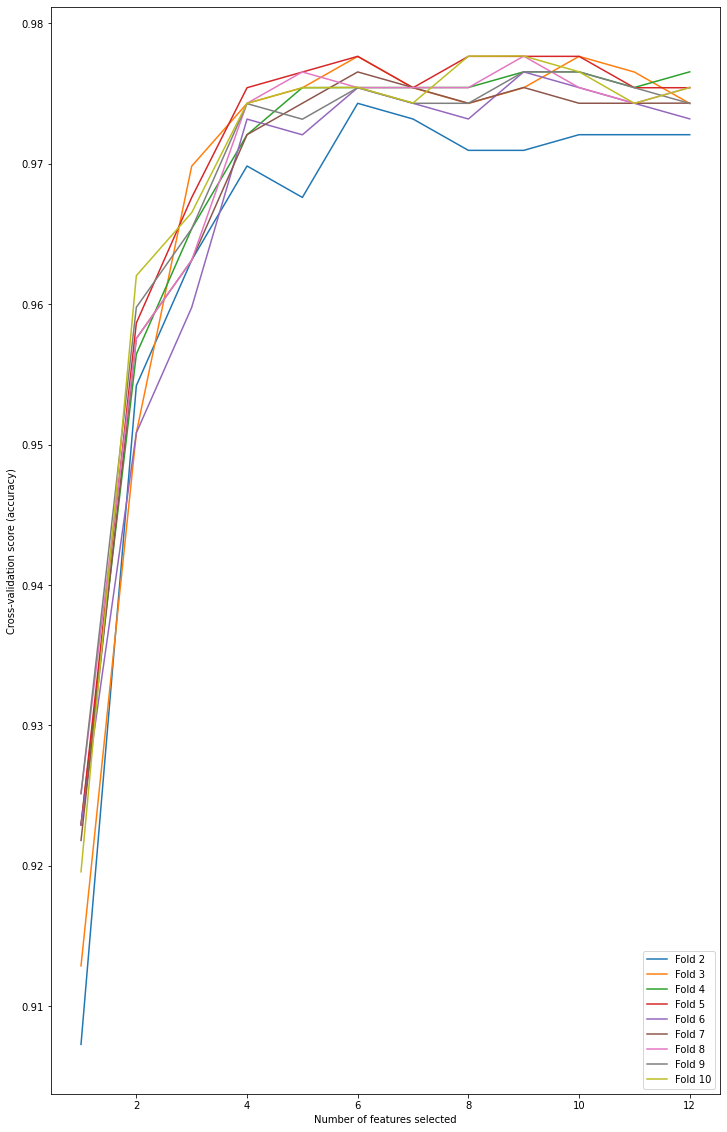

In [126]:
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=None, random_state=42)

models = {
    # 'SVM': SVC(), #4 fold=5
    # 'Logistic Regression': LogisticRegression(), #5 fold=5
    # 'Decision Tree': DecisionTreeClassifier(), #3
    'Random Forest': RandomForestClassifier(), #355
    # 'XGBoost': XGBClassifier() #2
}


logreg_clf = LogisticRegression()
model=logreg_clf

plt.figure(figsize=(12, 20))
for fold in range(2,11):
    # 初始化 StratifiedKFold
    stratified_kfold = StratifiedKFold(n_splits=fold, shuffle=True, random_state=42)
    print(stratified_kfold.get_n_splits(x, y))

    # 初始化RFECV，cv參數是交叉驗證的次數，可以選擇StratifiedKFold或其他交叉驗證方法
    rfecv = RFECV(estimator=model, step=1, cv=stratified_kfold, scoring='accuracy')
    X_train_rfecv = rfecv.fit(x, y)

    # for i, (train_index, test_index) in enumerate(stratified_kfold.split(x, y)):
        # print(f"Fold {i}:")
        # print(f"  Train: index={train_index}")
        # print(f"  Test:  index={test_index}")


    print("Optimal Number of Features:", X_train_rfecv.n_features_)
    # print("Feature Rankings:", X_train_rfecv.ranking_)
    # print("Feature Select:",X_train_rfecv.support_)
    print("cross validation acc", max(X_train_rfecv.cv_results_['mean_test_score']))
    # 绘制特征排名的图表
    plt.plot(range(1, len(X_train_rfecv.cv_results_['mean_test_score']) + 1), X_train_rfecv.cv_results_['mean_test_score'], label=f"Fold {fold}")
        

# 繪製特徵排名的圖表
import matplotlib.pyplot as plt

plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")
# plt.plot(range(1, len(X_train_rfecv.grid_scores_) + 1), X_train_rfecv.grid_scores_)
plt.legend(loc="lower right")
plt.show()

In [ ]:
pd.DataFrame(X_train).to_csv("../result/traindata.csv",index=False)

In [ ]:
print(pd.DataFrame(x).shape,pd.DataFrame(y).shape)


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# 初始化模型
model = XGBClassifier()  # 请替换成你实际使用的模型

# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 初始化 StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# 进行交叉验证并绘制AUC-ROC曲线
for train_index, test_index in stratified_kfold.split(x, y):
    X_train_fold, X_val_fold = pd.DataFrame(x).iloc[train_index], pd.DataFrame(x).iloc[test_index]
    y_train_fold, y_val_fold = pd.DataFrame(y).iloc[train_index], pd.DataFrame(y).iloc[test_index]
    print([X_val_fold])

    # 使用 RFE 選擇特徵
    rfe = RFE(estimator=model, n_features_to_select=3)
    X_train_rfe = rfe.fit_transform(X_train_fold, y_train_fold)



    # 训练模型
    model.fit(X_train_rfe, y_train_fold)

    # 获取模型预测的概率
    y_val_prob = model.predict_proba([X_val_fold])[:, 1]

    # 计算ROC曲线
    fpr, tpr, _ = roc_curve(y_val_fold, y_val_prob)
    roc_auc = auc(fpr, tpr)

    # 绘制ROC曲线
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')

# 设置图表标签
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# 初始化模型
model = SVC(probability=True)  # 请替换成你实际使用的模型

# 将数据分为训练集和测试集
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 初始化 StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 进行交叉验证并绘制AUC-ROC曲线
for train_index, test_index in stratified_kfold.split(X_train, y_train):
    X_train_fold, X_val_fold = pd.DataFrame(x).iloc[train_index], pd.DataFrame(x).iloc[test_index]
    y_train_fold, y_val_fold = pd.DataFrame(y).iloc[train_index], pd.DataFrame(y).iloc[test_index]
    print("X_val_fold:",X_val_fold)
    # 训练模型
    model.fit(X_train_fold, y_train_fold)

    # 获取模型预测的概率
    y_val_prob = model.predict_proba(X_val_fold)[:, 1]

    # 计算ROC曲线
    fpr, tpr, _ = roc_curve(y_val_fold, y_val_prob)
    roc_auc = auc(fpr, tpr)

    # 绘制ROC曲线
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')

# 设置图表标签
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc='lower right')
plt.show()
